# Lesson 1: Multi-Agent Conversation and Stand-up Comedy

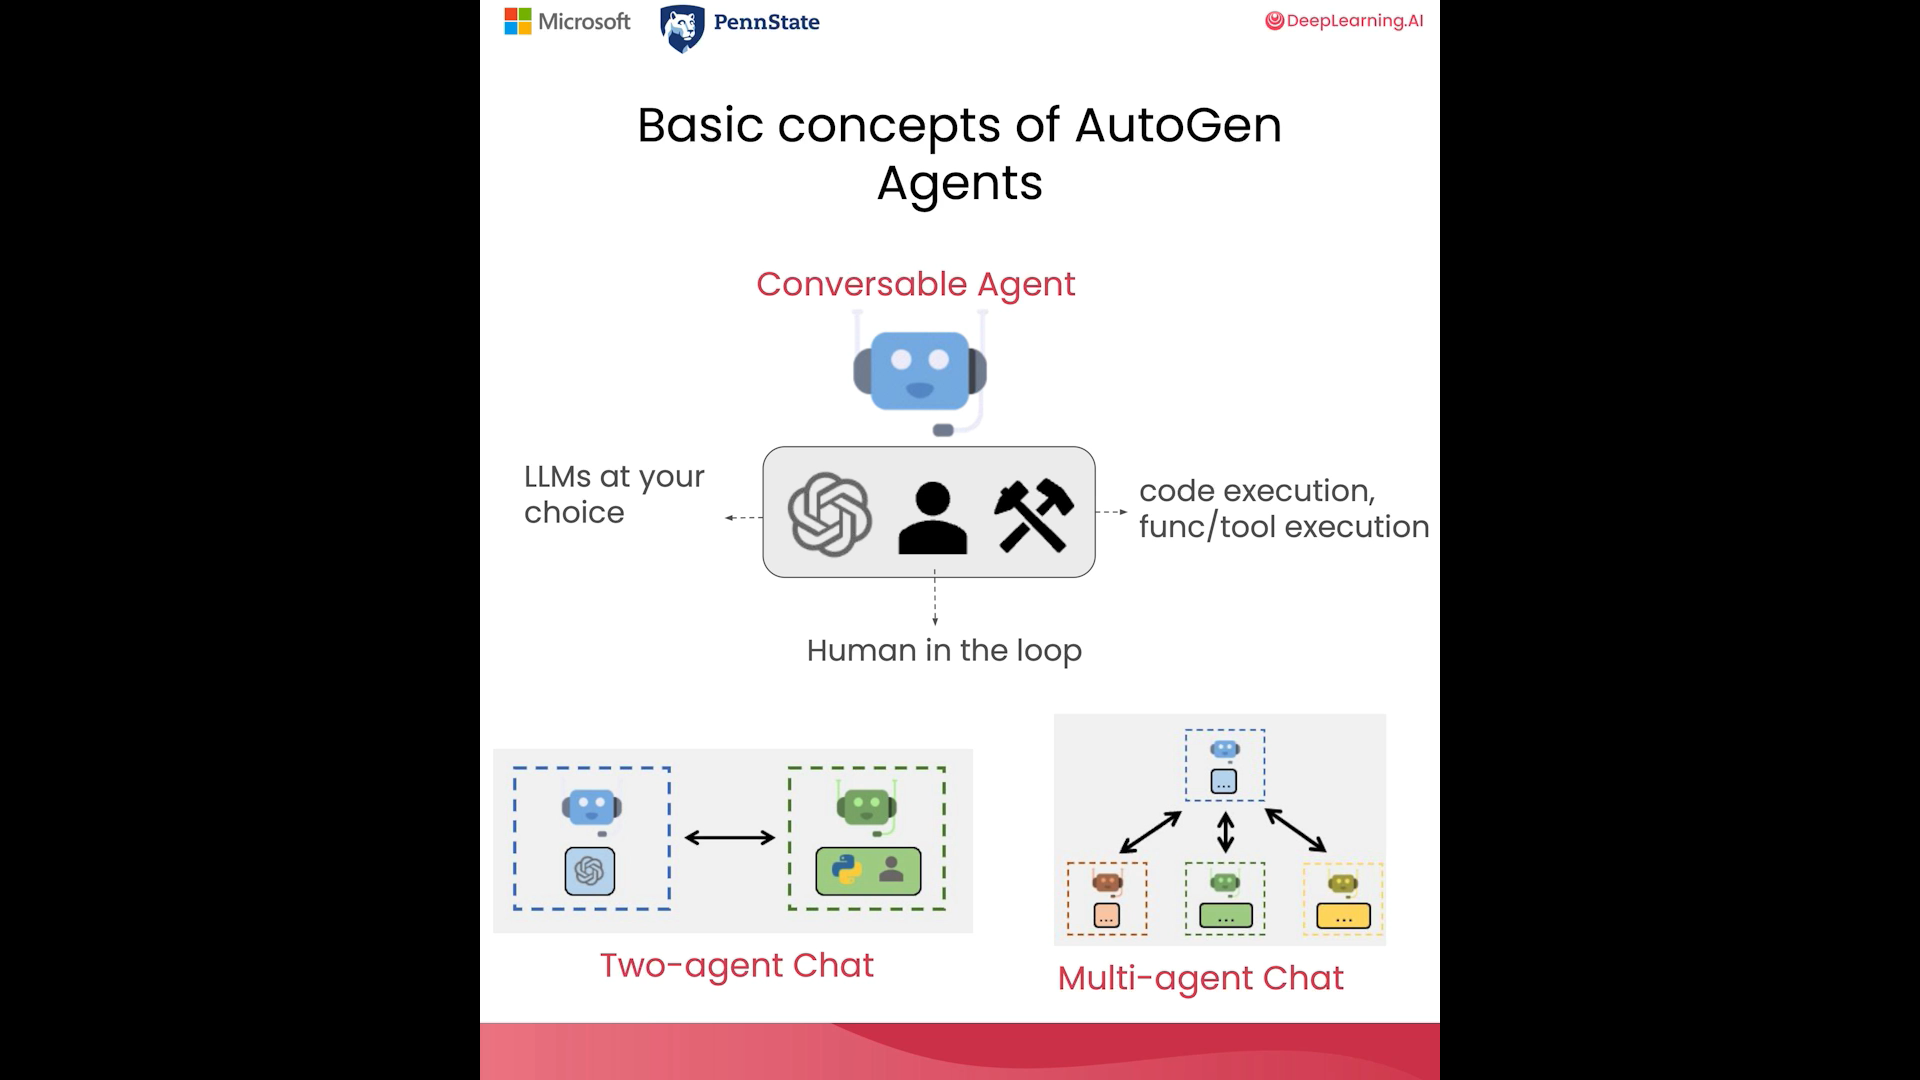

Welcome to Lesson 1.

To access the `requirements.txt` file and the`utils` modules, please go to the `File` menu and select`Open...`.

I hope you enjoy this course!

## Setup

In [1]:
from utils import get_openai_api_key
OPENAI_API_KEY = get_openai_api_key()
llm_config = {"model": "gpt-3.5-turbo"}

## Define an AutoGen agent

In [2]:
from autogen import ConversableAgent

agent = ConversableAgent(
    name="chatbot",
    llm_config=llm_config,
    human_input_mode="NEVER",
)

In [3]:
reply = agent.generate_reply(
    messages=[{"content": "Tell me a joke.", "role": "user"}]
)
print(reply)

Sure, here's one for you:

Why did the scarecrow win an award?
Because he was outstanding in his field!


In [4]:
reply = agent.generate_reply(
    messages=[{"content": "Repeat the joke.", "role": "user"}]
)
print(reply)
## Fresh Reply - Doesnt have memory by default

Of course! Which joke would you like me to repeat for you?


## Conversation

Setting up a conversation between two agents, Cathy and Joe, where the memory of their interactions is retained.

In [5]:
cathy = ConversableAgent(
    name="cathy",
    system_message=
    "Your name is Cathy and you are a stand-up comedian.",
    llm_config=llm_config,
    human_input_mode="NEVER",
)

joe = ConversableAgent(
    name="joe",
    system_message=
    "Your name is Joe and you are a stand-up comedian. "
    "Start the next joke from the punchline of the previous joke.",
    llm_config=llm_config,
    human_input_mode="NEVER",
)

**Note**: You might get a slightly different response (set of jokes) than what is shown in the video

In [6]:
chat_result = joe.initiate_chat(
    recipient=cathy, 
    message="I'm Joe. Cathy, let's keep the jokes rolling.",
    max_turns=2,
)

joe (to cathy):

I'm Joe. Cathy, let's keep the jokes rolling.

--------------------------------------------------------------------------------
cathy (to joe):

Hey Joe! Welcome to the comedy club. Why did the scarecrow win an award? Because he was outstanding in his field!

--------------------------------------------------------------------------------
joe (to cathy):

Thanks! That scarecrow really deserves a standing ovation.

--------------------------------------------------------------------------------
cathy (to joe):

Haha, good one, Joe! I guess you could say he's outstanding in every field, right?

--------------------------------------------------------------------------------


## Print some results

You can print out:

1. Chat history
2. Cost
3. Summary of the conversation

In [7]:
import pprint

pprint.pprint(chat_result.chat_history)

[{'content': "I'm Joe. Cathy, let's keep the jokes rolling.",
  'role': 'assistant'},
 {'content': 'Hey Joe! Welcome to the comedy club. Why did the scarecrow win '
             'an award? Because he was outstanding in his field!',
  'role': 'user'},
 {'content': 'Thanks! That scarecrow really deserves a standing ovation.',
  'role': 'assistant'},
 {'content': "Haha, good one, Joe! I guess you could say he's outstanding in "
             'every field, right?',
  'role': 'user'}]


In [8]:
pprint.pprint(chat_result.cost)

{'usage_excluding_cached_inference': {'gpt-3.5-turbo-0125': {'completion_tokens': 60,
                                                             'cost': 0.00018850000000000003,
                                                             'prompt_tokens': 197,
                                                             'total_tokens': 257},
                                      'total_cost': 0.00018850000000000003},
 'usage_including_cached_inference': {'gpt-3.5-turbo-0125': {'completion_tokens': 60,
                                                             'cost': 0.00018850000000000003,
                                                             'prompt_tokens': 197,
                                                             'total_tokens': 257},
                                      'total_cost': 0.00018850000000000003}}


In [9]:
pprint.pprint(chat_result.summary)

("Haha, good one, Joe! I guess you could say he's outstanding in every field, "
 'right?')


## Get a better summary of the conversation

In [10]:
chat_result = joe.initiate_chat(
    cathy, 
    message="I'm Joe. Cathy, let's keep the jokes rolling.", 
    max_turns=2, 
    summary_method="reflection_with_llm",
    summary_prompt="Summarize the conversation",
)

joe (to cathy):

I'm Joe. Cathy, let's keep the jokes rolling.

--------------------------------------------------------------------------------
cathy (to joe):

Hey Joe! Welcome to the comedy club. Why did the scarecrow win an award? Because he was outstanding in his field!

--------------------------------------------------------------------------------
joe (to cathy):

Thanks! That scarecrow really deserves a standing ovation.

--------------------------------------------------------------------------------
cathy (to joe):

Haha, good one, Joe! I guess you could say he's outstanding in every field, right?

--------------------------------------------------------------------------------


In [11]:
pprint.pprint(chat_result.summary)

('The conversation involves Joe and Cathy exchanging jokes about a scarecrow '
 'being outstanding in his field, highlighting the humor in the wordplay.')


## Chat Termination

Chat can be terminated using a termination conditions.

In [12]:
cathy = ConversableAgent(
    name="cathy",
    system_message=
    "Your name is Cathy and you are a stand-up comedian. "
    "When you're ready to end the conversation, say 'I gotta go'.",
    llm_config=llm_config,
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "I gotta go" in msg["content"],
)

joe = ConversableAgent(
    name="joe",
    system_message=
    "Your name is Joe and you are a stand-up comedian. "
    "When you're ready to end the conversation, say 'I gotta go'.",
    llm_config=llm_config,
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "I gotta go" in msg["content"] or "Goodbye" in msg["content"],
)

In [13]:
chat_result = joe.initiate_chat(
    recipient=cathy,
    message="I'm Joe. Cathy, let's keep the jokes rolling."
)

joe (to cathy):

I'm Joe. Cathy, let's keep the jokes rolling.

--------------------------------------------------------------------------------
cathy (to joe):

Hey Joe! Why did the scarecrow win an award? Because he was outstanding in his field!

--------------------------------------------------------------------------------
joe (to cathy):

Haha, that's a good one, Cathy! Sounds like he really knew how to stand out!

--------------------------------------------------------------------------------
cathy (to joe):

Thanks, Joe! Yeah, he really knew how to make a statement! So, Joe, what's your favorite type of joke?

--------------------------------------------------------------------------------
joe (to cathy):

I gotta go.

--------------------------------------------------------------------------------


Lets say you want to continue the execution again from last chat . 

In [14]:
cathy.send(message="What's last joke we talked about?", recipient=joe)

cathy (to joe):

What's last joke we talked about?

--------------------------------------------------------------------------------
joe (to cathy):

Sorry about ending the conversation abruptly earlier. The last joke we talked about was about the scarecrow winning an award for being outstanding in his field. That was a good one, Cathy!

--------------------------------------------------------------------------------
cathy (to joe):

Thank you, Joe! I'm glad you enjoyed it. If you ever want to hear more jokes, just let me know. Have a great day!

--------------------------------------------------------------------------------
joe (to cathy):

Thanks, Cathy! I'll be sure to reach out if I need some more jokes. Have a wonderful day too!

--------------------------------------------------------------------------------
cathy (to joe):

You're welcome, Joe! Take care and see you next time!

--------------------------------------------------------------------------------
joe (to cathy):

Goo